# Image Thresholding

In thresholding, every pixel value of an image is classified into one of two categories, based on some threshold value. For example if a threshold is 100, then pixel intensities less than 100 are Category 1, and above 100 are Category 2. Based on the Category, and Thresholding Method, the pixel values are processed.

In general, thresholding is applied to Grayscale images, or just a single channel of a color image. `inRange()` can be applied to color images.

In this tutorial we will cover the following:
* Simple Thresholding
* Adaptive Thresholding
* Binary Masks with `inRange`
* Otsu's Thresholding
* Tips for Effective Thresholding

---

## Standard Imports

In [2]:
import cv2
import numpy as np
from tutorial_utils.utils import *
from matplotlib import pyplot as plt
DATA_DIR = data_dir()

---

## Simple Thresholding

OpenCV provides `cv2.threshold()` for performing simple thresholding. It takes the following arguments:
* Source image
* Threshold (intensity) value
* Maximum value which is assigned to the pixel values exceeding the threshold
* Type of thresholding

OpenCV provides different types of thresholding. Here is a table showing the same:


| Flag | Description | Mathematical Function |
|------|-------------|------------------------|
| `THRESH_BINARY` | Binary threshold | $dst(x,y) = \begin{cases} \text{maxval} & \text{if } src(x,y) > \text{thresh} \\\\ 0 & \text{otherwise} \end{cases}$ |
| `THRESH_BINARY_INV` | Inverted binary threshold | $dst(x,y) = \begin{cases} 0 & \text{if } src(x,y) > \text{thresh} \\\\ \text{maxval} & \text{otherwise} \end{cases} $ |
| `THRESH_TRUNC` | Truncate values above threshold | $dst(x,y) = \begin{cases} \text{thresh} & \text{if } src(x,y) > \text{thresh} \\\\ src(x,y) & \text{otherwise} \end{cases}$|
| `THRESH_TOZERO` | Set values below threshold to zero | $ dst(x,y) = \begin{cases} src(x,y) & \text{if } src(x,y) > \text{thresh} \\\\ 0 & \text{otherwise} \end{cases} $|
| `THRESH_TOZERO_INV` | Inverted version of TOZERO | $ dst(x,y) = \begin{cases} 0 & \text{if } src(x,y) > \text{thresh} \\\\ src(x,y) & \text{otherwise} \end{cases} $|


Keys:
* $src(x,y)$ : Source Image's pixel value at (x,y)
* thresh : Threshold value
* $dst(x,y)$ : Destination/Output Image's pixel value at (x,y)
* maxval : The maximum value to be assigned at $dst(x,y)$ when $src(x,y)$ exceeds the threshold

---

### Example

This code compares the different thresholding types

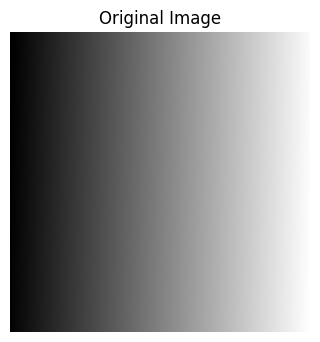

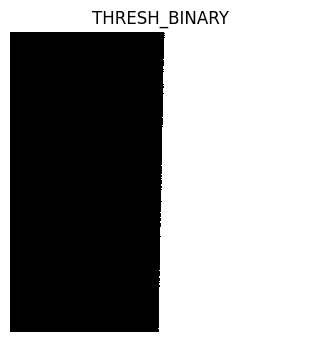

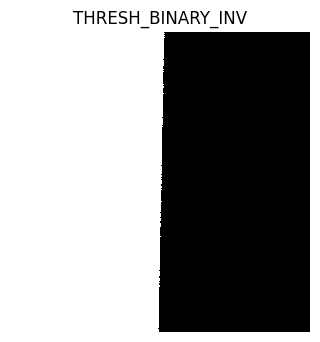

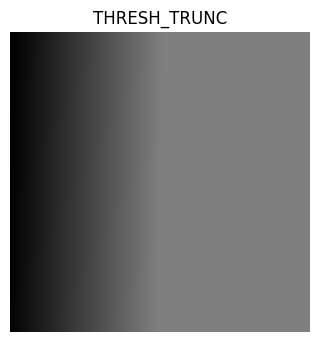

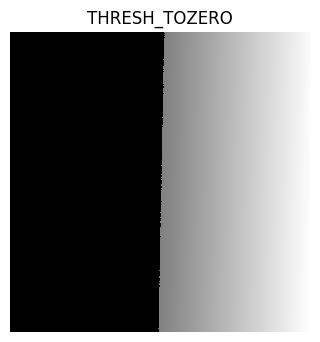

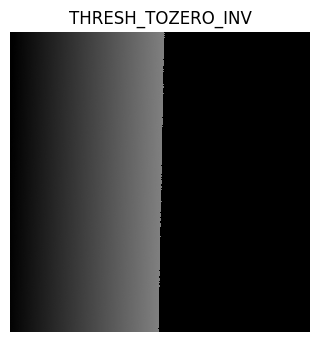

In [8]:
img = cv2.imread(DATA_DIR + 'gradient.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img, "Original Image")

# Args: (Image, Threshold Value, Max Value, Method)
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh1, "THRESH_BINARY")

ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh2, "THRESH_BINARY_INV")

ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
cv2_imshow(thresh3, "THRESH_TRUNC")

ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
cv2_imshow(thresh4, "THRESH_TOZERO")

ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
cv2_imshow(thresh5, "THRESH_TOZERO_INV")

---

## Adaptive Thresholding

In Simple Thresholding, we used one global value as a threshold. But this might not be good in all cases, for example if an image has different lighting in different areas. In such cases, adaptive thresholding can help.

Instead of using a global value, the algorithm determines the threshold for a pixel based on a small region around it. This way, different regions of the image get different thresholds.

OpenCV provides the `cv2.adaptiveThreshold()` function for this. It takes the following arguments:
* Input Image
* Maximum Value assigned to pixels exceeding the threshold
* Adaptive Threshold Method : Calculates a 'mean' or 'weighted mean' of the neighborhood pixels and uses that as the threshold
    * To handle pixels at the edge of the image, the function internally pads the image using `BORDER_REPLICATE`. Note that this padding method is not accessible to the user.
    * If you need to specify the border type to be applied before thresholding, you can pre-pad the image with a border of your choice and then crop the borders out after applying the threshold
* Thresholding type : Must be `THRESH_BINARY` or `THRESH_BINARY_INV`
* blockSize : Size of a pixel neighborhood that is used to calculate the threshold value for the pixel. Expected to be an odd number.
* C : A constant subtracted from the mean or weighted mean to fine-tune the threshold value.

There are two provided Adaptive Threshold Methods:
* `cv2.ADAPTIVE_THRESH_MEAN_C` : The threshold value is the mean of the neighborhood area minus the constant C
* `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: The threshold value is a gaussian-weighted sum of the neighborhood values minus the constant C.

---

### Example

In this example we compare global and adaptive thresholding for an image with varying illumination.

Don't worry too much about the `medianBlur()` - we will cover this in a later module. If you're interested, you can comment it out and see what difference it makes. You will see more noisy 'dots' appear.

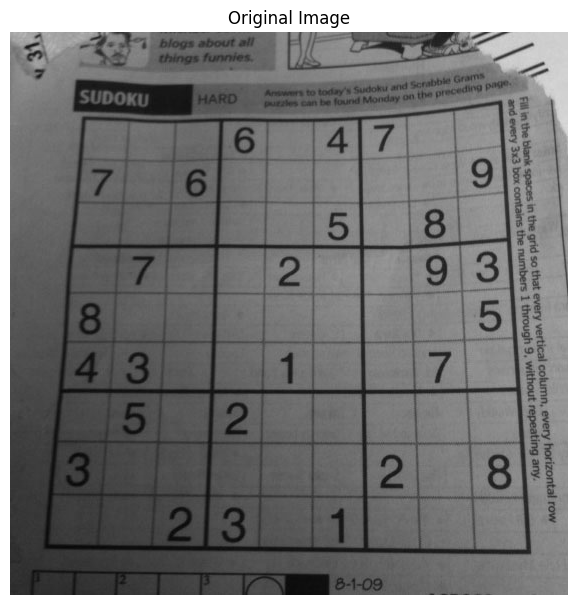

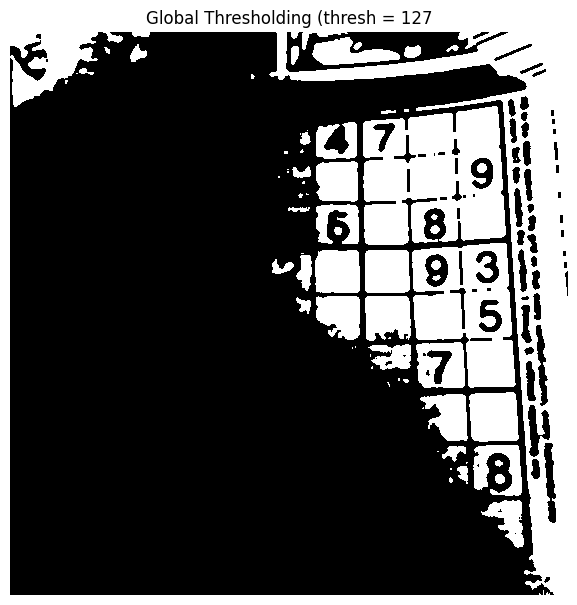

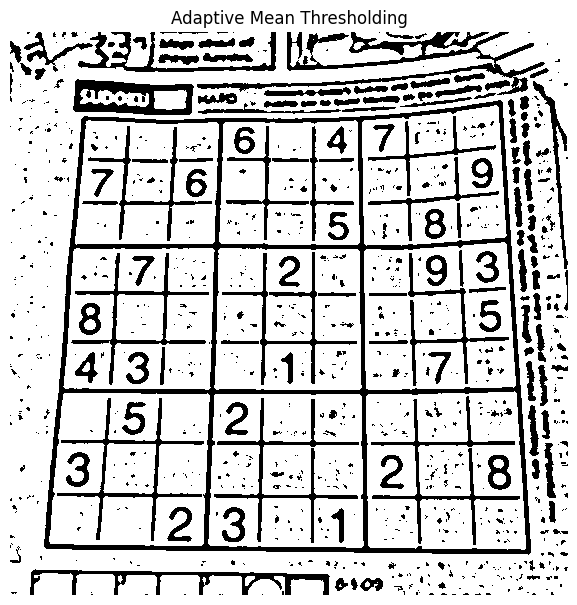

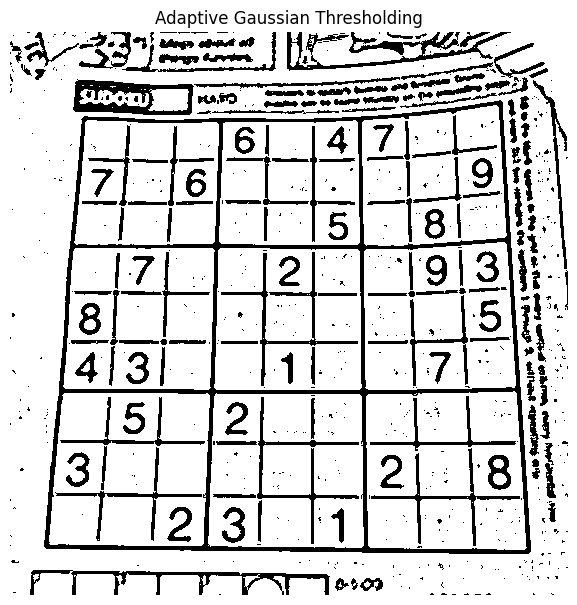

In [11]:
img = cv2.imread(DATA_DIR + 'sudoku.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img, "Original Image")

# Apply a blur to remove some noise
img = cv2.medianBlur(img, 5)

ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh1, "Global Thresholding (thresh = 127")

adaptive1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
cv2_imshow(adaptive1, "Adaptive Mean Thresholding")

adaptive2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
cv2_imshow(adaptive2, "Adaptive Gaussian Thresholding")

---

## Binary Masks with `inRange`

Sometimes you want to make binary masks based on whether certain regions of the image lie within a range of values. Anything in that region is marked as Pass / GO / Max Value, and everything else is marked as Fail / No-GO / 0. 

OpenCV provides `cv2.inRange()` to isolate pixels whose values are within a certain range. This function takes the following arguments:
* Image
* Lower bound threshold
* Upper bound threshold
* (optional) output mask, a single-channel 8-bit binary image.
    * This is the same as the returned value of this function. This is mostly just there in case you want to use a pre-allocated array for performance in a tight loop.

Note that `inRange` can be applied to color images. 

---

### Example

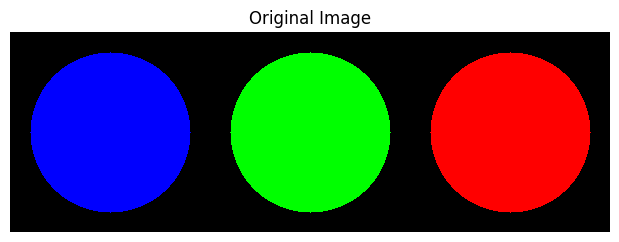

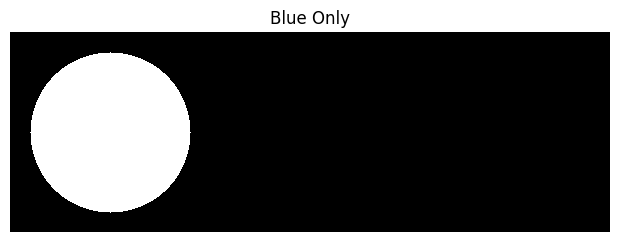

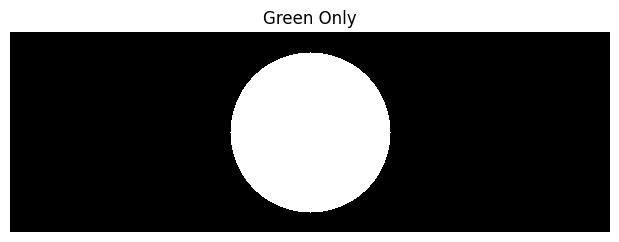

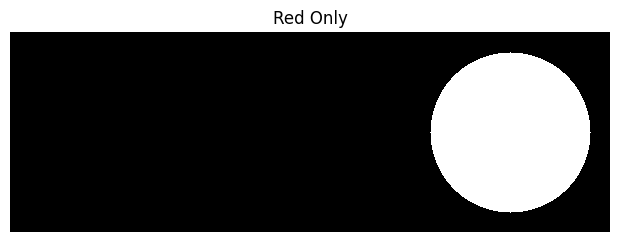

In [25]:
# Create an image with 3 colored circles
img = np.zeros((200, 600, 3), dtype=np.uint8)
cv2.circle(img, (100, 100), 80, (255, 0, 0), -1)
cv2.circle(img, (300, 100), 80, (0, 255, 0), -1)
cv2.circle(img, (500, 100), 80, (0, 0, 255), -1)

cv2_imshow(img, "Original Image")

blue_only = cv2.inRange(img, (240, 0, 0), (255, 0, 0))
green_only = cv2.inRange(img, (0, 240, 0), (0, 255, 0))
red_only = cv2.inRange(img, (0, 0, 240), (0, 0, 255))


cv2_imshow(blue_only, "Blue Only")
cv2_imshow(green_only, "Green Only")
cv2_imshow(red_only, "Red Only")

---

## Otsu's Thresholding

Otsu's thresholding is another method of automatic thresholding, that works on **bimodal** images. These are images where most pixel values fall into two 'buckets' or ranges of values. 

Consider the following image, and look at its histogram. You can see two 'peaks' in the image. The optimal global threshold value is then obtained from this histogram, and it lies between the two peaks. 

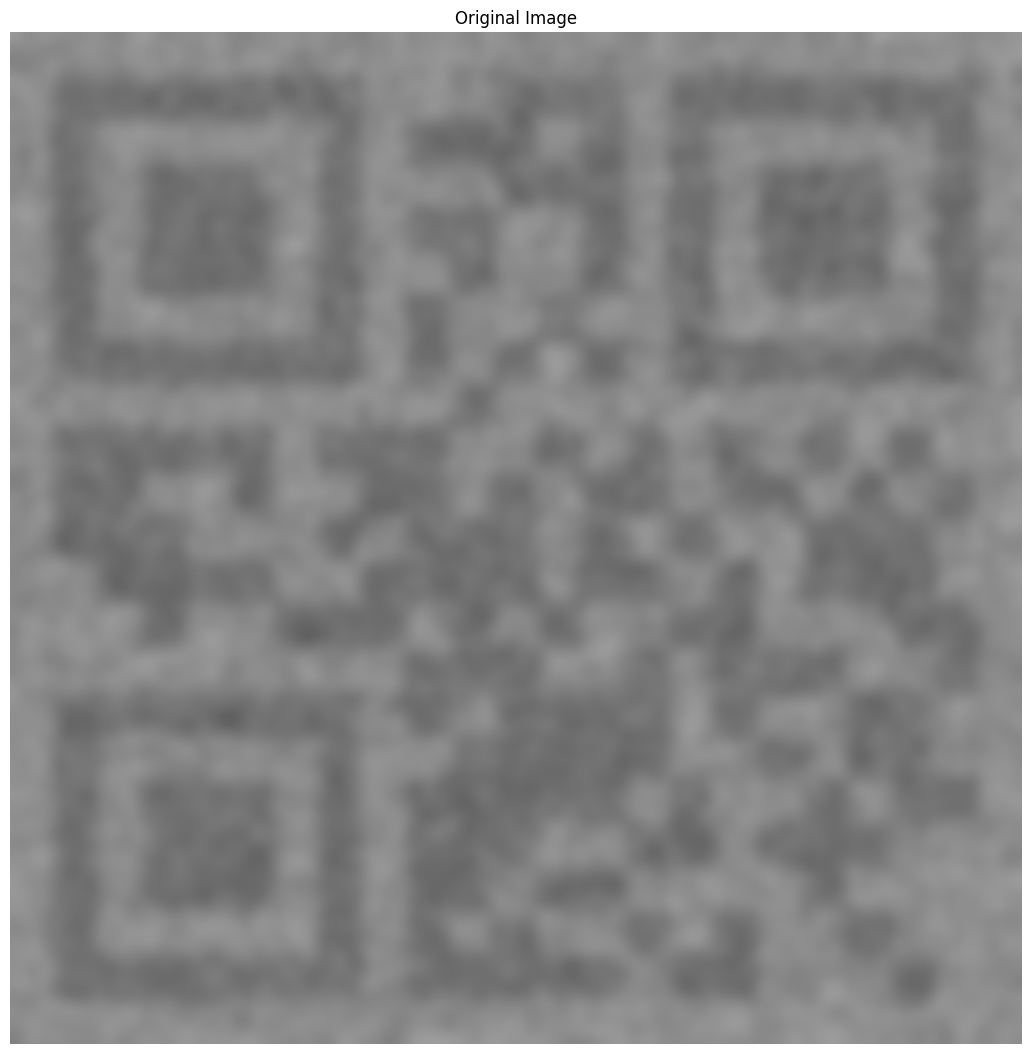

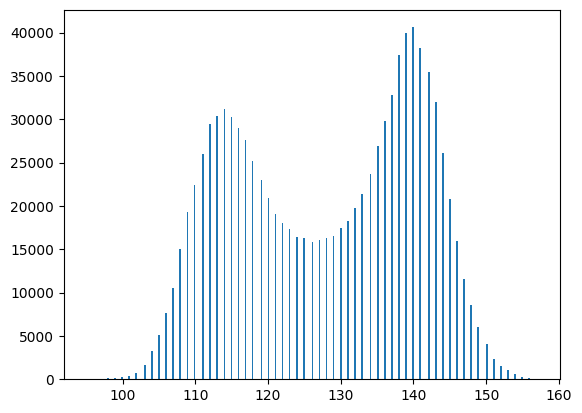

In [60]:
img = cv2.imread(DATA_DIR + 'noisy2.png', cv2.IMREAD_GRAYSCALE)
img = cv2.GaussianBlur(img, (55, 55), 0)
cv2_imshow(img, "Original Image")

plt.hist(img.ravel(), 256)
plt.show()

In order to use Otsu's thresholding, `cv2.threshold()` function is used, but `cv2.THRESH_OTSU` is passed as an extra flag. The threshold value can be chosen arbitrarily. 

Note that in this example we applied a filter to the image before applying the threshold. This can smudge some of the features like edges.

The `ret` value returned, is the optimal threshold value.

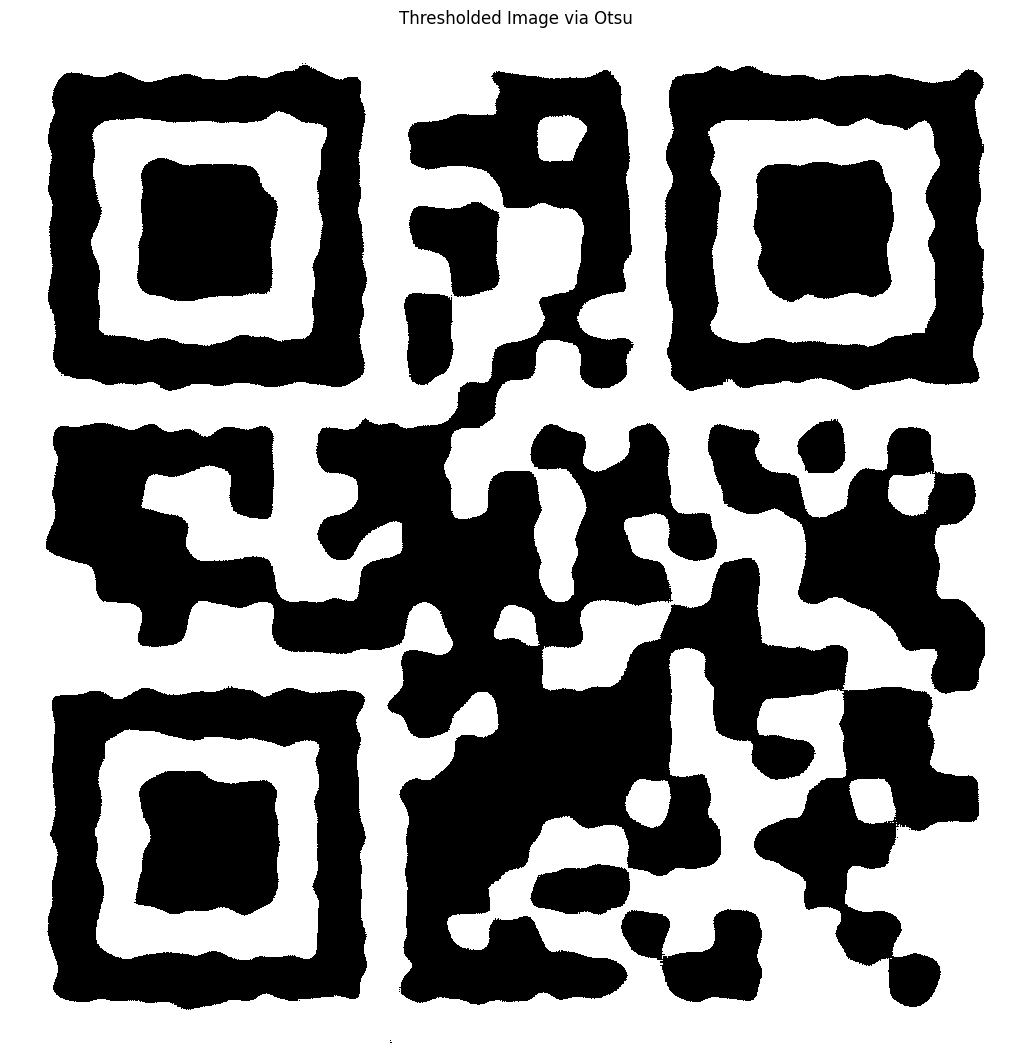

In [62]:
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2_imshow(thresh, "Thresholded Image via Otsu")

---

### Custom Implementation of Otsu's Algorithm

Here is an easy-to-understand (but by no means optimal) implementation of Otsu's algorithm.

Otsu's algorithm works on bimodal images. It tries to find a threshold value which maximizes the **between-class variance** between the two **classess** of pixels that the algorithm is trying to distinguish. The two calsses are : Background and Foreground. 

Between-class variance is calculated by measuring how far the average pixel intensity of each class is, from the overall average of all pixels, and then weighting that difference by the size of the class.

Typically, the formula for variance of some data is given by:

$\sigma^{2} = \frac{\Sigma(x_{i} - \mu)^{2}}{N}$

in which, we can think of each element of the data to be equally 'weighted' by `1/N`.

The formula for between-class variance looks similar; it is:

$\sigma_{between}^{2} = w_{0} * (\mu_{0} - \mu_{T})^{2} + w_{1} * (\mu_{1} - \mu_{T})^{2}$

where $\mu_{T}$ is the overall average of all pixels, and it is given by $(w_{0} * \mu_{0}) + (w_{1} * \mu_{1})$

If we substitute this value of $mu_{T}$ into the above equation, we get:

$\sigma_{between}^{2} = w_{0} * w_{1} * (\mu_{0} - \mu_{1})^2$


In the below code, you will find:
* First we split all pixels into two classes based on some threshold value $t$
* `w0, w1` are the calculated weights. This is simply the ratio of number of pixels on one side of the threshold, to the total number of pixels
* Then we compute the mean intensity of each class, `mu0, mu1`.
* Then we calculate the between-class variance
* We update the `best_thresh` and `max_between_var`

Best Threshold found:  128


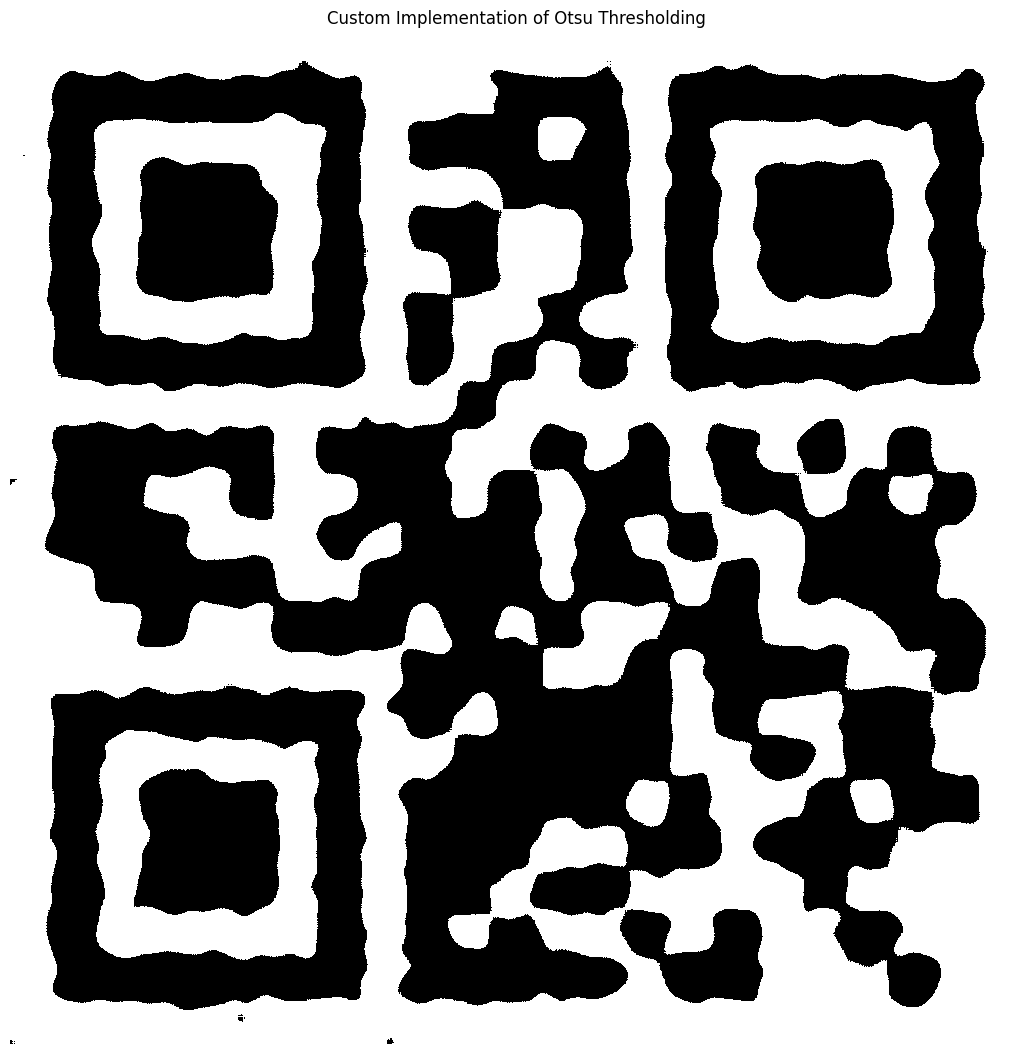

In [65]:
# Load an image and denoise it a bit. (Not part of the algorithm)
img = cv2.imread(DATA_DIR + 'noisy2.png', cv2.IMREAD_GRAYSCALE)
img = cv2.GaussianBlur(img, (55, 55), 0)

#------- Otsu's Algorithm begins here --------

# Compute a histogram

# hist = array of counts for each bin
# bins = array of boundaries i.e. edges that define the bins
hist, bins = np.histogram(img.flatten(), bins=256, range=[0, 256])

# Total number of pixels
total_px = img.size

best_thresh = 0
max_between_var = 0

# Try every possible threshold between 0 and 256
for t in range(256):

    # Split the 'array of counts of pixel values' into two partitions/classes
    h1 = hist[0:t]
    h2 = hist[t:]

    # Find how much % of the counts are in each partition / class
    # w0 + w1 = 1
    w0 = np.sum(h1) / total_px # Also called 'weight' of class 0
    w1 = np.sum(h2) / total_px # Also called 'weight' of class 1


    # If all pixels lie on one side of the threshold, it is not a good threshold
    if w0 == 0 or w1 == 0:
        continue

    # Find the mean of each class
    mu0 = np.sum(np.arange(0, t) * h1) / np.sum(h1)
    mu1 = np.sum(np.arange(t, 256) * h2) / np.sum(h2)

    # Calculate the 'between-class variance'
    between_var = w0 * w1 * (mu0 - mu1) ** 2

    # Update the best threshold
    if between_var > max_between_var:
        max_between_var = between_var
        best_thresh = t

print("Best Threshold found: ", best_thresh)

# Apply the threshold

_, otsu_img = cv2.threshold(img, best_thresh, 255, cv2.THRESH_BINARY)

cv2_imshow(otsu_img, "Custom Implementation of Otsu Thresholding")
    


---

## Tips for Effective Thresholding

* Pre-Processing: Usually applying a small Gaussian blur helps reduce noise before thresholding. This will prevent 'noisy dots' from appearing.

* Histogram Analysis: It is a good idea to analyse the image histogram to view the spread of intensity values. This can help with choosing the right threshold value or algorithm to use

* Adaptive vs Global: Use adaptive thresholding for images with varying illumination

* Otsu's method: Use this method when you know there are two distinct peaks in the histogram of the image. Sometimes you may not be able to see the peaks clearly, but after applying a blur those peaks might stand out

* Post-Processing: Morphological Operations can be used to clean up the thresholded image.